In [5]:

import yfinance as yf

# equity = "BAJAJFINSV.NS"
# equity = 'INFY.NS'

equity = 'UNITEDPOLY.NS'

yfinancedf = yf.download(equity, interval="1m", period="7d")
yfinancedf.columns = yfinancedf.columns.get_level_values(0)

df = yfinancedf.copy()
df['Time'] = df.index


[*********************100%***********************]  1 of 1 completed


In [6]:
df.head(10)

Price,Close,High,Low,Open,Volume,Time
Datetime,,,,,,
2025-04-23 03:45:00+00:00,16.000000,16.000000,15.999001,15.999001,0,2025-04-23 03:45:00+00:00
2025-04-23 03:46:00+00:00,16.427000,16.430000,16.394001,16.394001,114,2025-04-23 03:46:00+00:00
2025-04-23 03:48:00+00:00,16.299999,16.302000,16.299999,16.302000,8,2025-04-23 03:48:00+00:00
2025-04-23 03:49:00+00:00,16.389999,16.389999,16.389999,16.389999,518,2025-04-23 03:49:00+00:00
2025-04-23 03:51:00+00:00,16.299999,16.299999,16.299999,16.299999,0,2025-04-23 03:51:00+00:00
2025-04-23 03:52:00+00:00,16.300999,16.300999,16.299999,16.299999,43,2025-04-23 03:52:00+00:00
2025-04-23 03:53:00+00:00,16.250000,16.264999,16.250000,16.264999,61,2025-04-23 03:53:00+00:00
2025-04-23 03:54:00+00:00,16.221001,16.221001,16.219999,16.219999,4,2025-04-23 03:54:00+00:00
2025-04-23 03:56:00+00:00,16.180000,16.200001,16.142000,16.200001,28,2025-04-23 03:56:00+00:00


In [7]:
import pandas_ta as ta
import numpy as np

# Calculating the features

df['rsi'] = ta.rsi(close=df['Close'], length=14)
df['sma'] = ta.sma(close=df['Close'], length=20)

# Perccentage change of closing price from it's 20 period mean.
df['sma_deviation'] = (df['Close'] - df['sma']) / df['sma']
df['slope'] = (df['Close'] - df['Close'].shift(10)) / 10
df['logreturn'] = np.log(df['Close'] / df['Close'].shift(10))
df['logvolume'] = np.log(df['Volume'].replace(0, np.nan))
df['logvolume_mean'] = df['logvolume'].rolling(window=10).mean()
df['logvolume_std'] = df['logvolume'].rolling(window=10).std()

# Computing volume z score, how far log volume is from it's mean in terms of std deviation.
df['volume_zscore'] = (df['logvolume'] - df['logvolume_mean']) / df['logvolume_std']

# Close column would be used to calculate future returns for training & test data. Taking 10 units of return
df['future_return'] = (df['Close'].shift(-10) / df['Close']) - 1


df = df[['rsi', 'sma_deviation', 'slope', 'logreturn', 'volume_zscore', 'future_return', 'Close']]

df = df.dropna()
df.head(10)

Price,rsi,sma_deviation,slope,logreturn,volume_zscore,future_return,Close
Datetime,,,,,,,
2025-04-23 08:22:00+00:00,47.607820,-0.001288,-0.0064,-0.003941,0.101901,0.003332,16.208000
2025-04-23 08:27:00+00:00,47.607820,-0.001097,-0.0004,-0.000247,0.144163,-0.000494,16.208000
2025-04-23 08:32:00+00:00,47.455086,-0.000965,-0.0065,-0.004003,-0.410689,-0.000494,16.207001
2025-04-23 08:38:00+00:00,46.807599,-0.001221,-0.0005,-0.000309,-0.915073,0.003394,16.202999
2025-04-23 08:43:00+00:00,38.589298,-0.004403,-0.0055,-0.003401,0.501800,0.006813,16.145000
2025-04-23 09:15:00+00:00,47.048089,-0.001141,0.0004,0.000247,0.533171,-0.011794,16.194000
2025-04-24 09:35:00+00:00,53.410486,0.003354,-0.0210,-0.012482,0.824120,-0.013038,16.719999
2025-04-24 09:36:00+00:00,52.485718,0.001613,-0.0215,-0.012792,-0.371689,0.000000,16.700001
2025-04-24 09:37:00+00:00,44.236628,-0.010207,-0.0229,-0.013783,1.135354,0.003030,16.500000


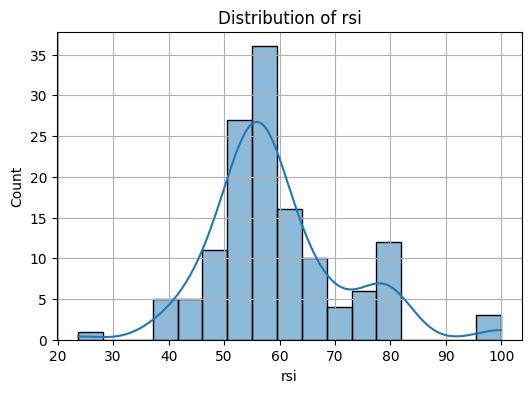

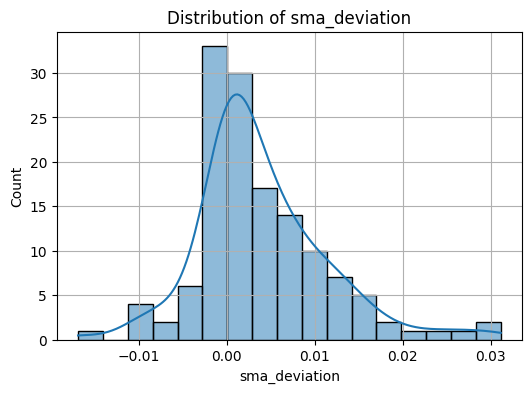

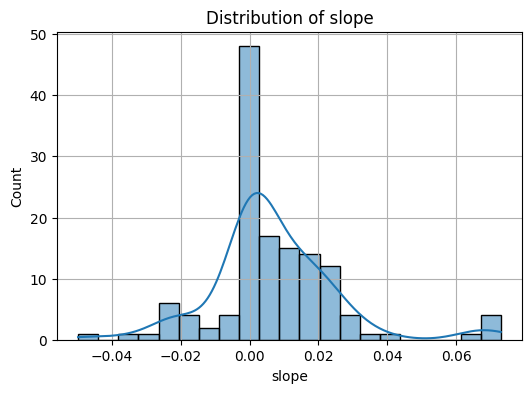

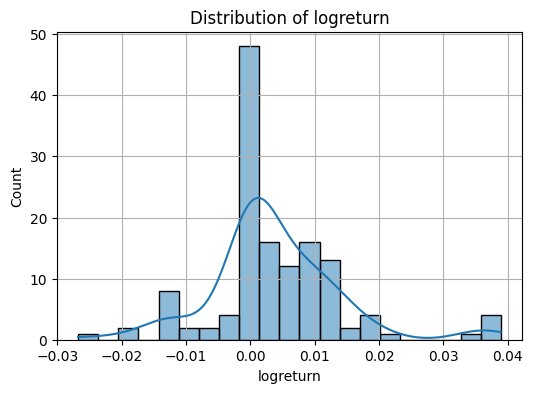

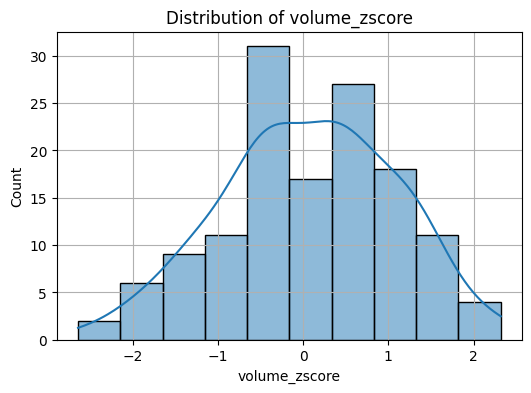

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['rsi', 'sma_deviation', 'slope', 'logreturn', 'volume_zscore']:
  plt.figure(figsize=(6, 4))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.grid(True)
  plt.show()


In [9]:
# Defining Market Regimes

bull_threshold = 0.002
bear_threshold = -0.002

"""
df['regime'] = np.select(
  [
    df['future_return'] > bull_threshold,
    df['future_return'] < bear_threshold
  ],
  ['bull', 'bear'],
  default='side'
)
"""

df['regime'] = np.select(
  [
    df['future_return'] > bull_threshold,
  ],
  ['bull'],
  default='side'
)

df.head(10)


Price,rsi,sma_deviation,slope,logreturn,volume_zscore,future_return,Close,regime
Datetime,,,,,,,,
2025-04-23 08:22:00+00:00,47.607820,-0.001288,-0.0064,-0.003941,0.101901,0.003332,16.208000,bull
2025-04-23 08:27:00+00:00,47.607820,-0.001097,-0.0004,-0.000247,0.144163,-0.000494,16.208000,side
2025-04-23 08:32:00+00:00,47.455086,-0.000965,-0.0065,-0.004003,-0.410689,-0.000494,16.207001,side
2025-04-23 08:38:00+00:00,46.807599,-0.001221,-0.0005,-0.000309,-0.915073,0.003394,16.202999,bull
2025-04-23 08:43:00+00:00,38.589298,-0.004403,-0.0055,-0.003401,0.501800,0.006813,16.145000,bull
2025-04-23 09:15:00+00:00,47.048089,-0.001141,0.0004,0.000247,0.533171,-0.011794,16.194000,side
2025-04-24 09:35:00+00:00,53.410486,0.003354,-0.0210,-0.012482,0.824120,-0.013038,16.719999,side
2025-04-24 09:36:00+00:00,52.485718,0.001613,-0.0215,-0.012792,-0.371689,0.000000,16.700001,side
2025-04-24 09:37:00+00:00,44.236628,-0.010207,-0.0229,-0.013783,1.135354,0.003030,16.500000,bull


In [10]:
# Checking class distribution


# Choose only those assets in which there is enough data for all the classes in which we are trying to classify (~20% or more)
# Features should be normally distributed

df['regime'].value_counts(normalize=True)


regime
side    0.720588
bull    0.279412
Name: proportion, dtype: float64

In [11]:
%pip install pandas_ta scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\sparsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

features = ['rsi', 'slope', 'logreturn', 'volume_zscore']

split_idx = int(len(df) * 0.8)
X_train = df.iloc[:split_idx][features]
y_train = df.iloc[:split_idx]['regime']
X_test = df.iloc[split_idx:][features]
y_test = df.iloc[split_idx:]['regime']

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

        bull       0.00      0.00      0.00         0
        side       1.00      0.18      0.30        28

    accuracy                           0.18        28
   macro avg       0.50      0.09      0.15        28
weighted avg       1.00      0.18      0.30        28



C:\Users\sparsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sparsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sparsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: U

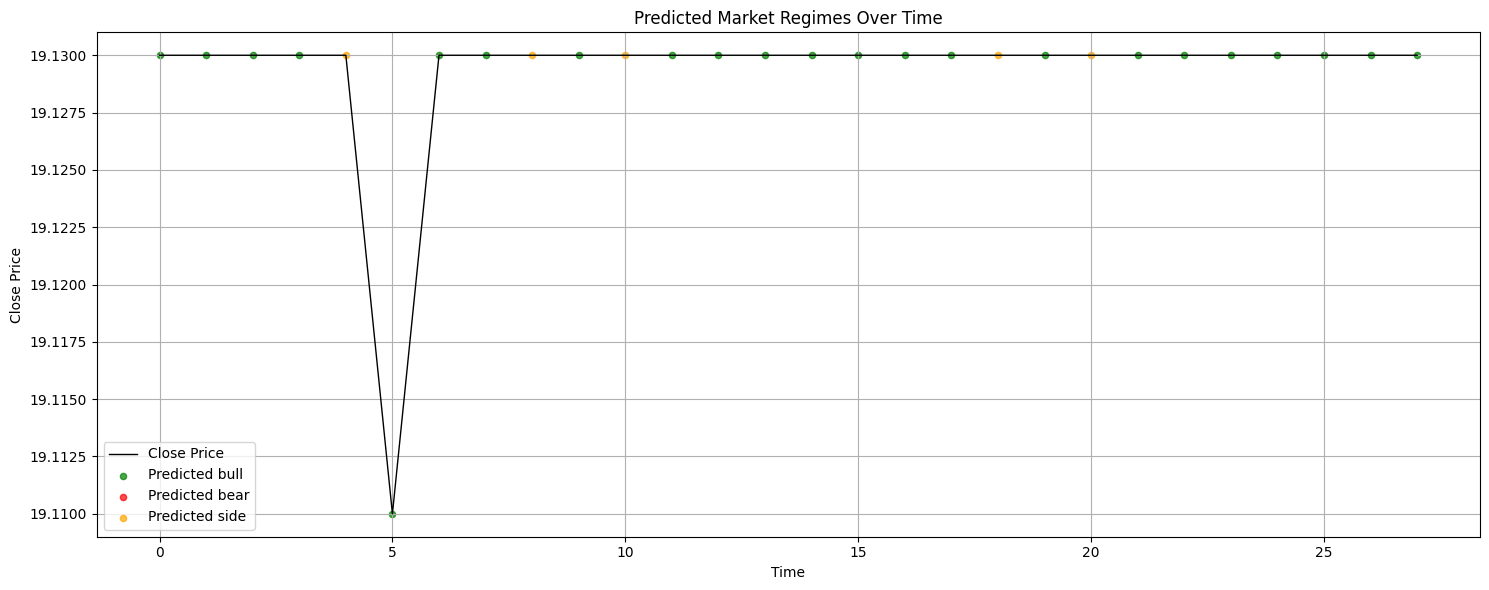

In [13]:


# Visualization

df_test = df.iloc[split_idx:].copy()
df_test['predicted_regime'] = y_pred

df_test = df_test.reset_index(drop=True)

plt.figure(figsize=(15, 6))
plt.plot(df_test.index, df_test['Close'], label='Close Price', color='black', linewidth=1)

colors = {'bull': 'green', 'bear': 'red', 'side': 'orange'}
for regime in ['bull', 'bear', 'side']:
  idx = df_test[df_test['predicted_regime'] == regime].index
  plt.scatter(idx, df_test.loc[idx, 'Close'], color=colors[regime], label=f'Predicted {regime}', s=20, alpha=0.7)

plt.title('Predicted Market Regimes Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Compute confusion matrix
# labels = ['bull', 'bear', 'side']
labels = ['bull', 'side']
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Display as a labeled DataFrame
confusion_df = pd.DataFrame(cm, index=[f"Actual_{l}" for l in labels], columns=[f"Pred_{l}" for l in labels])

# Print confusion matrix
print(confusion_df)

# Compute precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=labels, digits=3))

             Pred_bull  Pred_side
Actual_bull          7         57
Actual_side         13        433

Classification Report:
              precision    recall  f1-score   support

        bull      0.350     0.109     0.167        64
        side      0.884     0.971     0.925       446

    accuracy                          0.863       510
   macro avg      0.617     0.540     0.546       510
weighted avg      0.817     0.863     0.830       510



C:\Users\sparsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sparsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sparsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py

<Figure size 800x500 with 0 Axes>

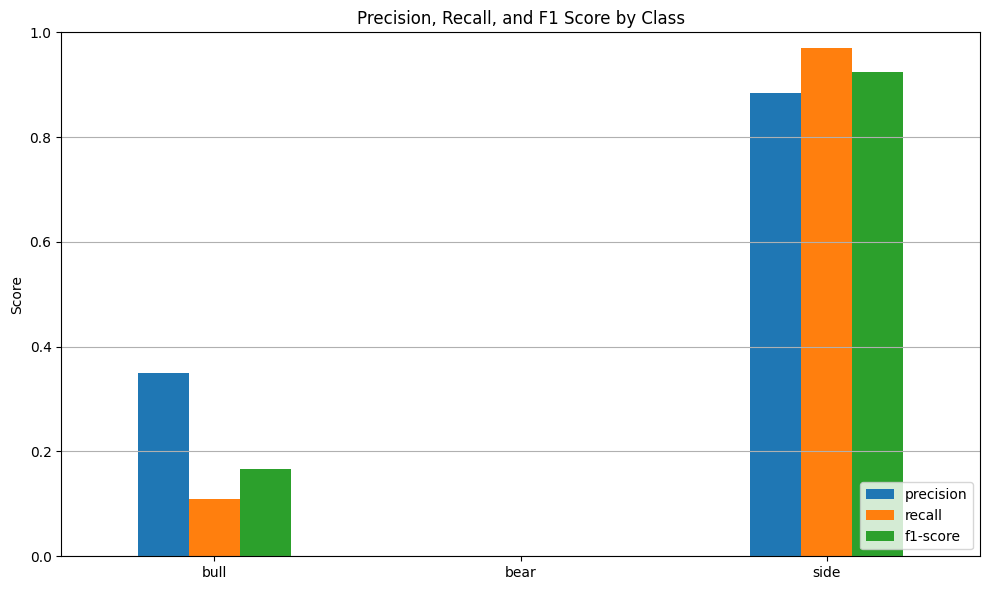

In [59]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get classification report as dict
report = classification_report(y_test, y_pred, labels=['bull', 'bear', 'side'], output_dict=True)

# Convert to DataFrame for easy plotting
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.loc[['bull', 'bear', 'side'], ['precision', 'recall', 'f1-score']]

# Plotting
plt.figure(figsize=(8, 5))
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, and F1 Score by Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
